# 複数の周期性が重なったデータでをトレンド・季節/周期性・残差に分解する

```
K. Bandura, R.J. Hyndman, and C. Bergmeir (2021) MSTL: A Seasonal-Trend Decomposition Algorithm for Time Series with Multiple Seasonal Patterns. arXiv preprint arXiv:2107.13462.
```

MSTLはSTL分解(LOESSによる季節・トレンド分解)手法を拡張したもので、複数の季節パターンを持つ時系列の分解が可能です。MSTLはstatsmodelの `version==0.14.0` 以降でのみ使用可能です。詳細は[ドキュメント](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.MSTL.html)をご確認ください。


補足：Anacondaを仮想環境として使用している場合、`conda install -c conda-forge statsmodels`でインストールされるものは`0.13.X`となっています(2022/11/1時点)。その場合、作業中の仮想環境の中で以下のコマンドを使用して最近のバージョンをインストールしてください。


```
pip install git+https://github.com/statsmodels/statsmodels
```

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib
    !pip install seaborn
    !pip install git+https://github.com/statsmodels/statsmodels

In [2]:
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import MSTL

## サンプルデータを作成
周期的な数値を複数組合せ、さらに区分的にトレンドが変化しています。また `np.random.rand()` でノイズも乗せています。

In [3]:
date_list = pd.date_range("2018-01-01", periods=1000, freq="D")
value_list = [
    10
    + i % 14
    + 2 * np.sin(10 * np.pi * i / 24)
    + 5 * np.cos(2 * np.pi * i / (24 * 7)) * 2
    + np.log(i**3 + 1)
    + np.sqrt(i)
    for i, di in enumerate(date_list)
]

df = pd.DataFrame(
    {
        "日付": date_list,
        "観測値": value_list,
    }
)

df.head(10)

,日付,観測値
0,2018-01-01,20.000000
1,2018-01-02,24.618006
2,2018-01-03,26.583476
3,2018-01-04,26.587164
4,2018-01-05,28.330645
5,2018-01-06,32.415653
6,2018-01-07,35.578666
7,2018-01-08,35.663289
8,2018-01-09,34.892380
9,2018-01-10,36.617664


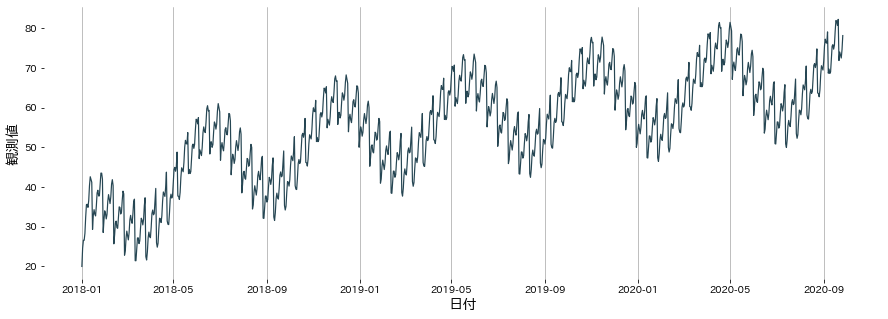

In [4]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=df["日付"], y=df["観測値"])
plt.grid(axis="x")
plt.show()

# トレンド・季節/周期性・残差に分解する

In [5]:
periods = (24, 24 * 7)
mstl = MSTL(df["観測値"], periods=periods).fit()

- トレンド(.trend)
- 季節/周期性(.seasonal)
- 残差(.resid)

をそれぞれプロットしてみます。今回は二つの周期の異なる三角関数を足しているので `.seasonal` には二つの列が含まれています。
残差のプロットにところどころ山があるものの、ほとんどの領域で残差が0に近い（＝きれいに分解できている）ことが確認できます。

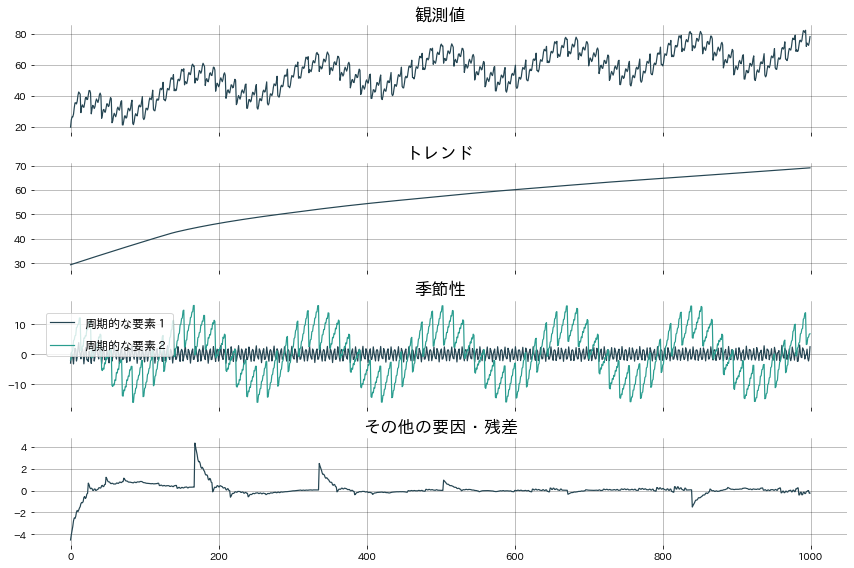

In [6]:
_, axes = plt.subplots(figsize=(12, 8), ncols=1, nrows=4, sharex=True)

axes[0].set_title("観測値")
axes[0].plot(mstl.observed)
axes[0].grid()

axes[1].set_title("トレンド")
axes[1].plot(mstl.trend)
axes[1].grid()

axes[2].set_title("季節性")
axes[2].plot(mstl.seasonal.iloc[:, 0], label="周期的な要素１")
axes[2].plot(mstl.seasonal.iloc[:, 1], label="周期的な要素２")
axes[2].legend()
axes[2].grid()

axes[3].set_title("その他の要因・残差")
axes[3].plot(mstl.resid)
axes[3].grid()

plt.tight_layout()
plt.show()